<a href="https://colab.research.google.com/github/kowshik91/online_pay_fraud/blob/main/Online_pay_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data = pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data = pd.read_csv('onlinefraud.csv')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219765 entries, 0 to 219764
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            219765 non-null  int64  
 1   type            219765 non-null  object 
 2   amount          219765 non-null  float64
 3   nameOrig        219765 non-null  object 
 4   oldbalanceOrg   219765 non-null  float64
 5   newbalanceOrig  219764 non-null  float64
 6   nameDest        219764 non-null  object 
 7   oldbalanceDest  219764 non-null  float64
 8   newbalanceDest  219764 non-null  float64
 9   isFraud         219764 non-null  float64
 10  isFlaggedFraud  219764 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 18.4+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,219765.000000,2.197650e+05,2.197650e+05,2.197640e+05,2.197640e+05,2.197640e+05,219764.000000,219764.0
mean,10.330407,1.808084e+05,8.825071e+05,9.003847e+05,9.497383e+05,1.189618e+06,0.000705,0.0
std,2.192156,3.254299e+05,2.794303e+06,2.831588e+06,2.369067e+06,2.633400e+06,0.026548,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.229706e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,11.000000,7.083043e+04,1.952100e+04,0.000000e+00,5.525830e+04,1.464908e+05,0.000000,0.0
75%,12.000000,2.306170e+05,1.932596e+05,2.294439e+05,7.889001e+05,1.195410e+06,0.000000,0.0
max,14.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

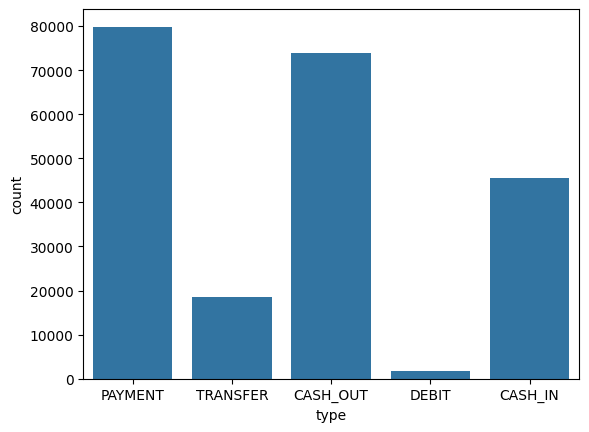

In [ ]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

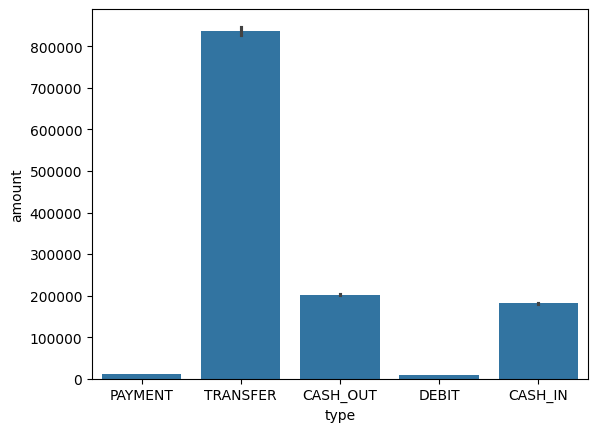

In [ ]:
sns.barplot(x='type', y='amount', data=data)

In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,219609
1.0,155


<ipython-input-22-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

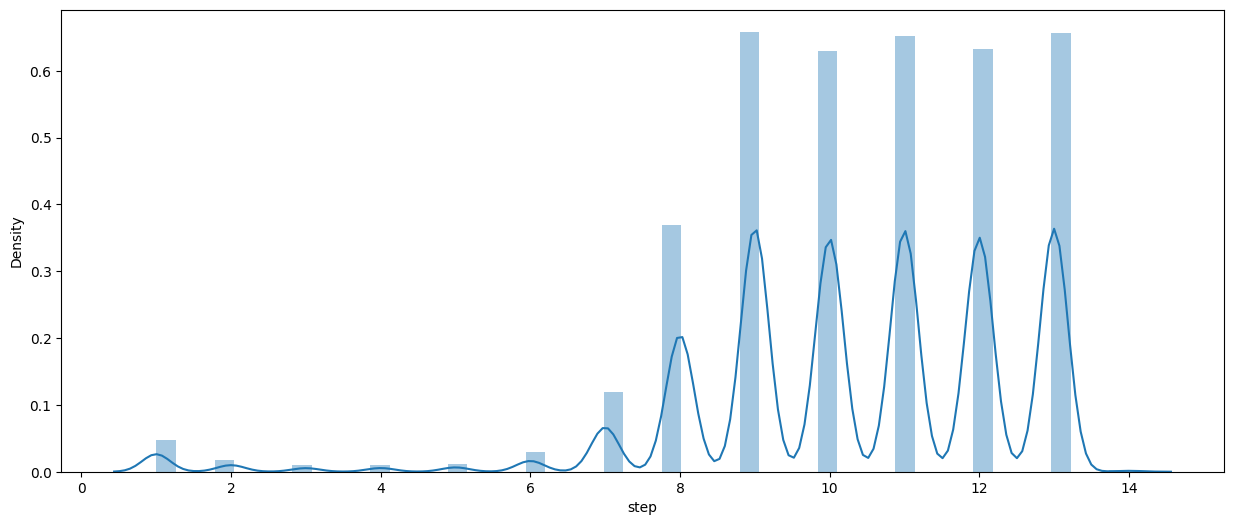

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,True,False


In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']
X.shape, y.shape

((219765, 11), (219765,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models = [LogisticRegression(), XGBClassifier(),SVC(kernel='rbf', probability=True),RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)]
for i in range(len(models)):
    models[i].fit(X_test, y_test)
    print(f'{models[i]} : ')
    train_preds = models[i].predict_proba(X_test)[:, 1]
    print('Training Accuracy : ', ras(y_test, train_preds))
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9449484237549738
Validation Accuracy :  0.9449484237549738

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC(probability=True) : 
Training Accuracy :  0.805078749701092
Validation Accu

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
X = np.random.rand(100, 5)
y = np.random.randint(0, 2, size=100)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models = [LogisticRegression(),XGBClassifier(use_label_encoder=False, eval_metric='logloss'),SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)]
for model in models:
    model.fit(X_train, y_train)
def get_user_input():
    print("Please enter the features for prediction:")
    user_input = []
    for i in range(X.shape[1]):
        value = float(input(f"Feature {i + 1}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)
while True:
    user_data = get_user_input()
    print("\nPredictions:")
    for model in models:
        prediction = model.predict(user_data)
        prediction_proba = model.predict_proba(user_data)[:, 1]
        result = "Fraud" if prediction[0] == 1 else "Not Fraud"
        print(f"{model.__class__.__name__}: {result}, Probability = {prediction_proba[0]:.4f}")
    if input("\nDo you want to make another prediction? (y/n): ").lower() != 'y':
        break

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Please enter the features for prediction:
Feature 1: 545
Feature 2: 54
Feature 3: 5532
Feature 4: 48
Feature 5: 45

Predictions:
LogisticRegression: Fraud, Probability = 1.0000
XGBClassifier: Not Fraud, Probability = 0.1001
SVC: Not Fraud, Probability = 0.4040
RandomForestClassifier: Not Fraud, Probability = 0.0000

Do you want to make another prediction? (y/n): n
